In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

#Knn classification 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [76]:
df = pd.read_json("/Users/cheukyancheeranlo/Documents/WorkHard_.IT.Master.Griffith/7130ICT Data Analytics/Practice/data_set/loan_approval_dataset.json")

In [77]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [78]:
df.shape

(252000, 13)

In [7]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [8]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [10]:
#Get unique value from column 
#pd.concat()  combines the text from multiple ranges and/or strings

pd.concat([df['Married/Single'], df['Car_Ownership'], df['House_Ownership']]).unique()

array(['single', 'married', 'no', 'yes', 'rented', 'norent_noown',
       'owned'], dtype=object)

In [11]:
#create new data set tranform categorical data to quantitative data
clean_df = df 

#replace() replace column to 0,1 or 0,1,2
clean_df['Married/Single'] = clean_df['Married/Single'].replace({'married': 1, 'single': 0})
clean_df['Car_Ownership'] = clean_df['Car_Ownership'].replace({'yes':1, 'no':0})
clean_df['House_Ownership'] = clean_df['House_Ownership'].replace({'norent_noown':0, 'rented':1, 'owned':2})


# LabelEncoder() to convert complex categorical variables into numerical form
featured_column = ['Profession', 'CITY', 'STATE']
le = LabelEncoder()
for col in featured_column:
    clean_df[col] = le.fit_transform(clean_df[col])


In [12]:
#Remove the columns which are not relevant 
clean_df = clean_df.drop(['Id'],axis=1)

In [13]:
clean_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,0,1,0,33,251,13,3,13,0
1,7574516,40,10,0,1,0,43,227,14,9,13,0
2,3991815,66,4,1,1,0,47,8,12,4,10,0
3,6256451,41,2,0,1,1,43,54,17,2,12,1
4,5768871,47,11,0,1,0,11,296,22,3,14,1


 **Classification - KNN**

Apply K Nearest Neighbors to classify the target column, Risk Flag, based on the other columns in the dataset. By calculates centroids as the mean of the data points and assign to each cluster based on the nearest centroid. <br />
1.Encode the categorical data to quantitative data <br />
2.Set other coulmns as features data and Risk Flag as target data <br />
3.split the dataset into training and testing sets. <br />
4.Standardise the data <br />
5.Set K as 2 to perform prediction (2 group of classtering) <br />


In [15]:

#KNN considers all provided feature columns for its calculations and uses the target column only for the final prediction based on the identified nearest neighbors.

#split dataset in features and target variable for loan approval through behaviour dataframe

X = clean_df.drop('Risk_Flag',axis=1) # contains all the feature columns.
y = clean_df['Risk_Flag'] # Target coulmns, Risk Flag


In [354]:
# Split the data into training and testing sets  --Random_state to keep data consident 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8842460317460318
Confusion Matrix:
[[64175  2154]
 [ 6597  2674]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     66329
           1       0.55      0.29      0.38      9271

    accuracy                           0.88     75600
   macro avg       0.73      0.63      0.66     75600
weighted avg       0.86      0.88      0.87     75600



**Classification Random forest <br />**
 
1.Encode the categorical data to quantitative data <br />
2.Set other coulmns as features data and Risk Flag as target data <br />
3.split the dataset into training and testing sets. <br />
4.Standardise the data <br />
5.Set random forest to perform prediction <br />

In [19]:
# Initialize and train the random Forest 
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Make predictions on the testing data
forest_pre = forest.predict(X_test)

In [21]:
#dataframe to check the difference between the actual values and predicted values
print("Prediction Results of Loan Approval through Behaviour")
pre_test_value_difference = pd.DataFrame({'Actual Values (Loan Approval through Behaviour)':y_test, 'Random Forest (Loan Approval through Behaviour)':forest_pre})
pre_test_value_difference.head()

Prediction Results of Loan Approval through Behaviour


,Actual Values (Loan Approval through Behaviour),Random Forest (Loan Approval through Behaviour)
75255,0,0
192435,0,0
154839,0,0
59774,0,0
63788,0,0


In [22]:
# Evaluate the model
forest_accuracy = accuracy_score(y_test, forest_pre)
print(forest_accuracy)

0.8991931216931217


In [23]:
print(metrics.classification_report(y_test, forest_pre))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66329
           1       0.60      0.55      0.57      9271

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600



**Using Random forest to find importance attribute** <br />
Tree-based models

In [25]:
feature_importances = forest.feature_importances_
print(feature_importances)

[0.19245578 0.14269245 0.08140997 0.01017314 0.01375561 0.0122637
 0.14501931 0.1626325  0.10136208 0.07253392 0.06570155]


In [26]:
column_names = clean_df.columns.drop('Risk_Flag')
print(column_names)

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS'],
      dtype='object')


In [33]:
#ensure both arrays have the same len 
print(len(feature_importances))
print(len(column_names))

11
11


In [48]:
# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': column_names,  # Use feature names for readability
    'Importance':feature_importances  # Corresponding importance scores
})

In [50]:
# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(features_df)

              Feature  Importance
0              Income    0.192456
7                CITY    0.162632
6          Profession    0.145019
1                 Age    0.142692
8               STATE    0.101362
2          Experience    0.081410
9     CURRENT_JOB_YRS    0.072534
10  CURRENT_HOUSE_YRS    0.065702
4     House_Ownership    0.013756
5       Car_Ownership    0.012264
3      Married/Single    0.010173


**Find quartile deviation of important atrribute** <br />
findind influence attribute for all approved loan 

In [52]:
condition = (clean_df['Risk_Flag'] == 1)  ##only have data with Risk Flag is 0 (all aprroved loan)  

In [56]:
df_target_noflag = clean_df.drop(clean_df.loc[condition].index)


In [58]:
df_target_noflag.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,0,1,0,33,251,13,3,13,0
1,7574516,40,10,0,1,0,43,227,14,9,13,0
2,3991815,66,4,1,1,0,47,8,12,4,10,0
5,6915937,64,0,0,1,0,11,130,14,0,12,0
6,3954973,58,14,1,1,0,31,299,22,8,12,0


In [299]:
df_target_noflag['Income'].describe().map('{:.0f}'.format)

count     221004
mean     5000449
std      2872255
min        10310
25%      2520633
50%      5002134
75%      7470480
max      9999938
Name: Income, dtype: object

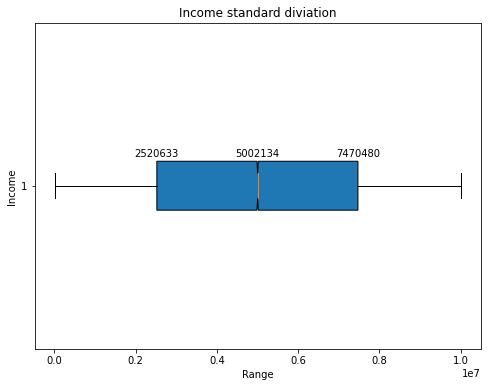

In [351]:
# Calculate the quantiles
q1 = df_target_noflag['Income'].quantile(0.25)
median = df_target_noflag['Income'].quantile(0.50)
q3 = df_target_noflag['Income'].quantile(0.75)

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 6))
 

# Creating axes instance
bp = ax.boxplot(df_target_noflag['Income'], whis=[0,100], patch_artist = True,
                notch ='True', vert = 0)

ax.set_title("Income standard diviation")
ax.set_ylabel("Income")
ax.set_xlabel("Range")

# Annotate the boxplot with quantile values
ax.text(q1, 1.1, f'{q1:.0f}', horizontalalignment='center', verticalalignment='center')
ax.text(median, 1.1, f'{median:.0f}', horizontalalignment='center', verticalalignment='center')
ax.text(q3, 1.1, f'{q3:.0f}', horizontalalignment='center', verticalalignment='center')

# show plot
plt.show()

In [62]:
df_target_noflag['Age'].describe()

count    221004.000000
mean         50.093442
std          17.016058
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: Age, dtype: float64

In [273]:
##Create dataframe without flag 
df_withno_riskflag = df.drop(df.loc[condition].index)

In [279]:
##Create table to show top 30 city that appliants are from
##reset_index converts the series into a DataFrame, moving the city names from the index to a column.

top_30_city = df_withno_riskflag['CITY'].value_counts().reset_index()

top_30_city.columns = ['City', 'Count']
    
top30city = top_30_city.head(30)


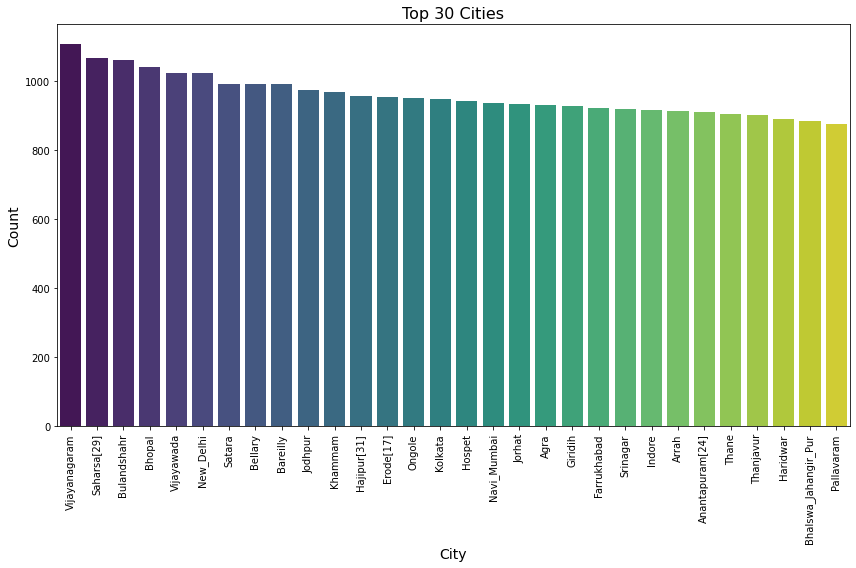

In [293]:
#plot to show Top 30 city 
plt.figure(figsize=(12, 8))
sns.barplot(x= top30city['City'], y= top30city['Count'], palette='viridis')
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 30 Cities', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

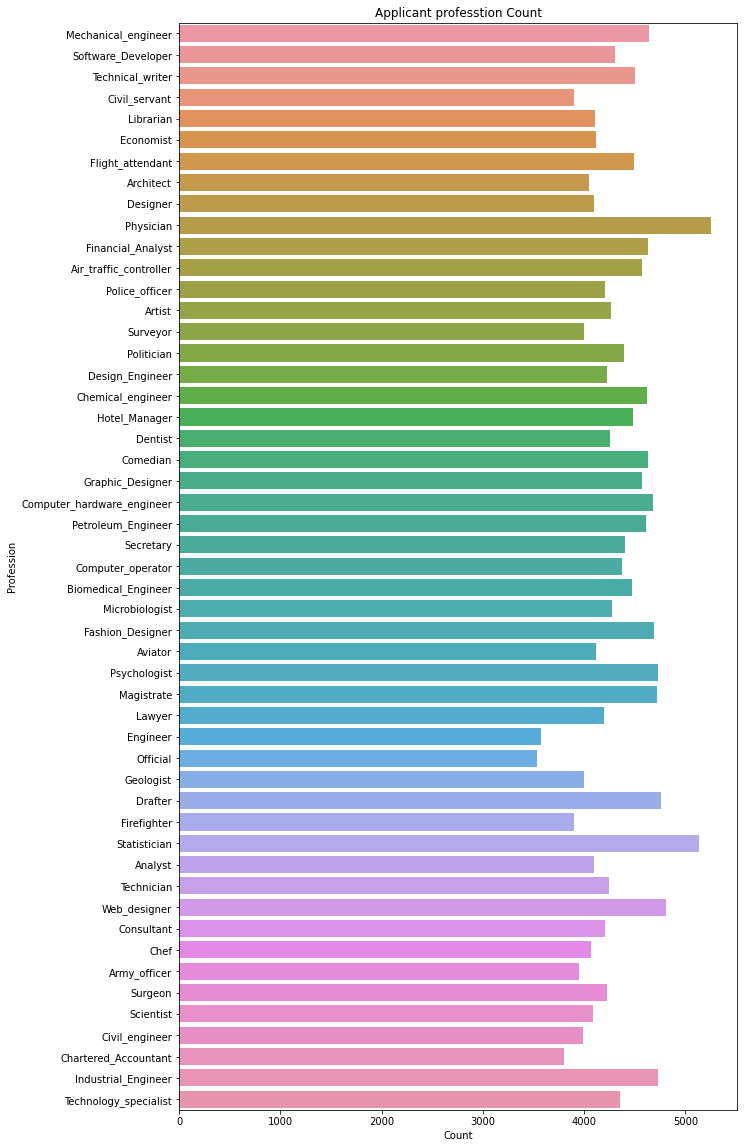

In [295]:
##Profession of the applicant

plt.figure(figsize=(10,20))
sns.countplot(y = df_withno_riskflag['Profession'])
plt.title("Applicant professtion Count")
plt.xlabel('Count')
plt.ylabel('Profession')
plt.show()